[Kaggle Code Source Link](https://www.kaggle.com/code/micaeld/diabetes-predict-tutorial-tensorflow) (Type-2 Diabetes)

[Dataset Link]( https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset)

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

Read Dataset

In [2]:
df = pd.read_csv('/content/diabetes_prediction_dataset.csv')

# Showing 5 rows from the dataset
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


Convert Categorical Columns

In [4]:
le = LabelEncoder()

list_str = ['gender', 'smoking_history']
for c in list_str:
    df[c] = le.fit_transform(df[c])

Split dataset into training and testing

In [5]:
X = df.drop('diabetes', axis = 1)
y = df['diabetes']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 0)

Standardize Data

In [6]:
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [7]:
model = Sequential([
    Dense(32, activation = 'relu', input_shape = (xtrain.shape[1],)),
    Dropout(0.1),
    Dense(32, activation = 'relu'),
    Dropout(0.5),
    Dense(1, activation = 'sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,377 (5.38 KB)

 Trainable params: 1,377 (5.38 KB)

 Non-trainable params: 0 (0.00 B)

Train Model

In [9]:
history = model.fit(xtrain, ytrain, epochs = 20, batch_size = 16, validation_data = (xtest, ytest))

Epoch 1/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9363 - loss: 0.1833 - val_accuracy: 0.9665 - val_loss: 0.1045
Epoch 2/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9657 - loss: 0.1065 - val_accuracy: 0.9693 - val_loss: 0.0928
Epoch 3/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9663 - loss: 0.1001 - val_accuracy: 0.9699 - val_loss: 0.0899
Epoch 4/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9689 - loss: 0.0934 - val_accuracy: 0.9707 - val_loss: 0.0858
Epoch 5/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9700 - loss: 0.0885 - val_accuracy: 0.9721 - val_loss: 0.0840
Epoch 6/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9705 - loss: 0.0875 - val_accuracy: 0.9721 - val_loss: 0.0842
Epoch 7/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9718 - loss: 0.0844 - val_accuracy: 0.9718 - val_loss: 0.0834
Epoch 8/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9711 - loss: 0.0860 -

Model Accuracy and Loss

In [10]:
loss, accuracy = model.evaluate(xtest, ytest)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9724 - loss: 0.0841
Test loss: 0.0826
Test accuracy: 0.9722


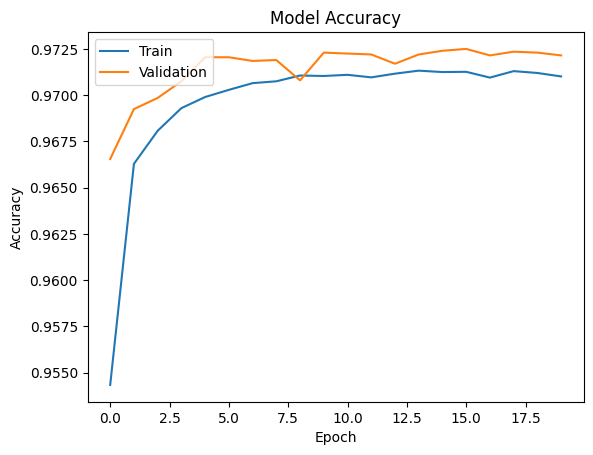

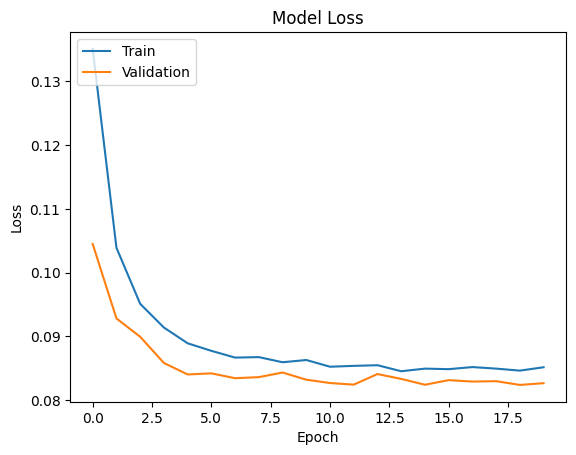

In [11]:
# Visualizing the training history (loss and accuracy)
import matplotlib.pyplot as plt

# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 988us/step


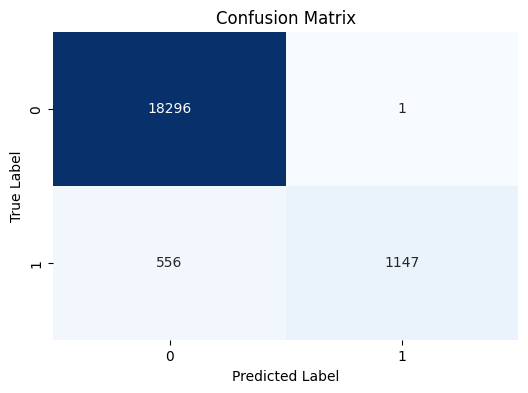

In [12]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions (binary classification, threshold of 0.5)
y_pred_ann = (model.predict(xtest) > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(ytest, y_pred_ann)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


Reproducing Results with PIMA Dataset (Gestational Diabetes) [Dataset Link](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Load the dataset
file_path = '/content/gestational_diabetes_dataset.csv'
data = pd.read_csv(file_path)

# Impute zero values in relevant columns (replace zeros with the mean)
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_with_zeros:
    data[column].replace(0, data[column].mean(), inplace=True)

# Separate features and target
X = data.drop(columns=['Outcome'])  # Features
y = data['Outcome']  # Target (binary classification)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.7846 - loss: 0.4605 - val_accuracy: 0.7561 - val_loss: 0.7868
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7925 - loss: 0.4138 - val_accuracy: 0.7480 - val_loss: 0.7446
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8041 - loss: 0.4452 - val_accuracy: 0.7398 - val_loss: 0.7373
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7928 - loss: 0.3954 - val_accuracy: 0.7398 - val_loss: 0.7805
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8053 - loss: 0.4067 - val_accuracy: 0.7236 - val_loss: 0.7916
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7890 - loss: 0.4469 - val_accuracy: 0.7236 - val_loss: 0.7788
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7898 - loss: 0.4244 - val_accuracy: 0.7236 - val_loss: 0.7615
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8090 - loss: 0.4429 - val_accuracy: 0.7236 - val_loss

Loss/Accuracy Curves for Reproduction

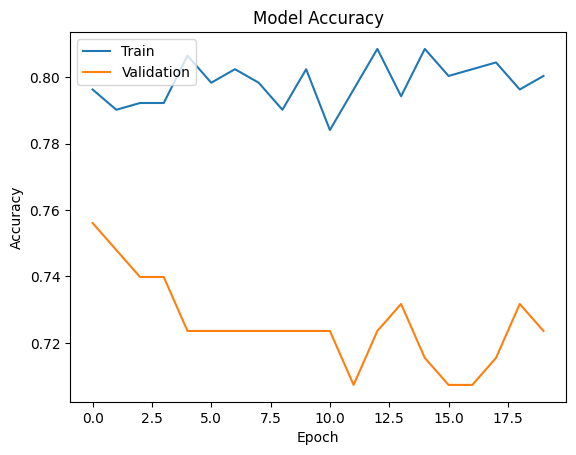

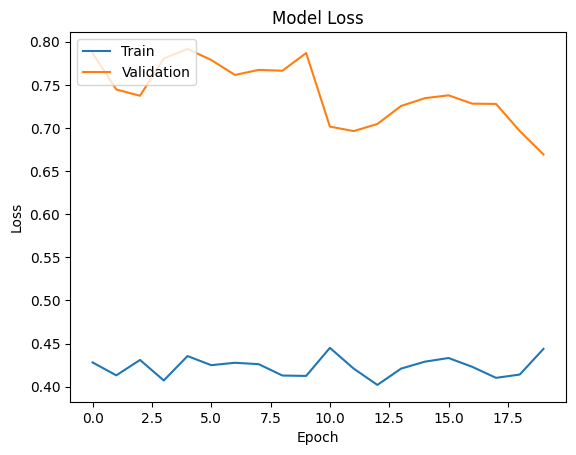

In [22]:
# Visualizing the training history (loss and accuracy)
import matplotlib.pyplot as plt

# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


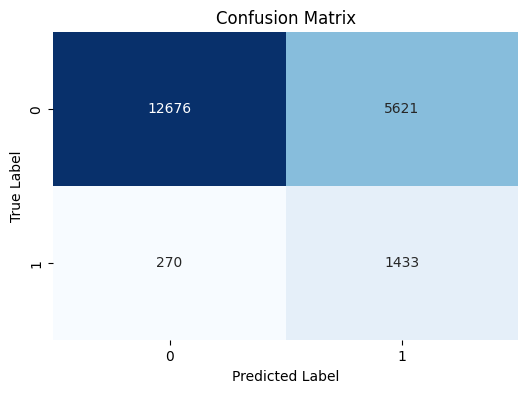

In [23]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions (binary classification, threshold of 0.5)
y_pred_ann = (model.predict(xtest) > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(ytest, y_pred_ann)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


Improving the Model (Early Stopping, Batch Normalization, Dropout)

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Load the dataset
file_path = '/content/gestational_diabetes_dataset.csv'
data = pd.read_csv(file_path)

# Impute zero values in relevant columns (replace zeros with the mean)
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_with_zeros:
    data[column].replace(0, data[column].mean(), inplace=True)

# Separate features and target
X = data.drop(columns=['Outcome'])  # Features
y = data['Outcome']  # Target (binary classification)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),  # Add dropout layer to reduce overfitting
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),  # Add batch normalization
    tf.keras.layers.Dropout(0.5),  # Add dropout
    tf.keras.layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Early stopping callback to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')


Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.3936 - loss: 1.0014 - val_accuracy: 0.4797 - val_loss: 0.8445
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4252 - loss: 0.8554 - val_accuracy: 0.4472 - val_loss: 0.8189
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4449 - loss: 0.8296 - val_accuracy: 0.4228 - val_loss: 0.7900
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4473 - loss: 0.8224 - val_accuracy: 0.4634 - val_loss: 0.7686
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4901 - loss: 0.8044 - val_accuracy: 0.4959 - val_loss: 0.7499
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5148 - loss: 0.8148 - val_accuracy: 0.5691 - val_loss: 0.7284
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5121 - loss: 0.7668 - val_accuracy: 0.5854 - val_loss: 0.7108
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5529 - loss: 0.7323 - val_accuracy: 0.5691 - 

Improving the Model (Increased Complexity, L2 Regularization, Learning Rate Schedular)

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Load the dataset
file_path = '/content/gestational_diabetes_dataset.csv'
data = pd.read_csv(file_path)

# Impute zero values in relevant columns (replace zeros with the mean)
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_with_zeros:
    data[column].replace(0, data[column].mean(), inplace=True)

# Separate features and target
X = data.drop(columns=['Outcome'])  # Features
y = data['Outcome']  # Target (binary classification)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model with L2 regularization, Dropout, and Batch Normalization
model = tf.keras.Sequential([
    tf.keras.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the model with a learning rate scheduler
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Early stopping callback to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Learning rate scheduler to reduce the learning rate if validation loss plateaus
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2,
                    callbacks=[early_stopping, lr_scheduler])

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')


Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 116ms/step - accuracy: 0.4969 - loss: 1.7128 - val_accuracy: 0.5366 - val_loss: 1.4642 - learning_rate: 0.0010
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5246 - loss: 1.7121 - val_accuracy: 0.6260 - val_loss: 1.4347 - learning_rate: 0.0010
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5697 - loss: 1.5756 - val_accuracy: 0.6667 - val_loss: 1.4076 - learning_rate: 0.0010
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5875 - loss: 1.5116 - val_accuracy: 0.6748 - val_loss: 1.3776 - learning_rate: 0.0010
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6105 - loss: 1.4431 - val_accuracy: 0.6748 - val_loss: 1.3486 - learning_rate: 0.0010
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6580 - loss: 1.3974 - val_accuracy: 0.6667 - val_loss: 1.3171 - learning_rate: 0.0010
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5693 - loss: 1.4009 - val_a

Improving the Model (RMSProp Optimizer, Ensemble Techniques, Batch Size Tuning, New Feature)

In [32]:
!pip install keras tensorflow

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = '/content/gestational_diabetes_dataset.csv'
data = pd.read_csv(file_path)

# Impute zero values in relevant columns (replace zeros with the mean)
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_with_zeros:
    data[column].replace(0, data[column].mean(), inplace=True)

# Feature Engineering: Create a new feature based on BMI and Age ratio
data['BMI_Age_Ratio'] = data['BMI'] / data['Age']

# Separate features and target
X = data.drop(columns=['Outcome'])  # Features
y = data['Outcome']  # Target (binary classification)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
def build_model():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
    ])

    # Compile the model with RMSprop optimizer
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0005),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Initialize the neural network model
nn_model = build_model()

# Early stopping callback to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Learning rate scheduler to reduce the learning rate if validation loss plateaus
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Train the neural network model
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2,
                       callbacks=[early_stopping, lr_scheduler])

# Evaluate the neural network model on the test set
loss, accuracy = nn_model.evaluate(X_test, y_test)
print(f'Neural Network Test loss: {loss:.4f}')
print(f'Neural Network Test accuracy: {accuracy:.4f}')

# Build additional models for ensemble learning
rf_model = RandomForestClassifier(n_estimators=100)
xgb_model = XGBClassifier()

# Train RandomForest and XGBoost
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Get predictions from all models
nn_predictions = (nn_model.predict(X_test) > 0.5).astype("int32")
rf_predictions = rf_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)

# Voting Ensemble: Majority Voting (Soft Voting)
final_predictions = (nn_predictions.flatten() + rf_predictions + xgb_predictions) // 2

# Calculate the final ensemble accuracy
ensemble_accuracy = accuracy_score(y_test, final_predictions)
print(f'Ensemble Model Test accuracy: {ensemble_accuracy:.4f}')



Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 544ms/step - accuracy: 0.5746 - loss: 2.4805 - val_accuracy: 0.6667 - val_loss: 2.1078 - learning_rate: 5.0000e-04
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5981 - loss: 2.3401 - val_accuracy: 0.7154 - val_loss: 2.0703 - learning_rate: 5.0000e-04
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5636 - loss: 2.3509 - val_accuracy: 0.7073 - val_loss: 2.0436 - learning_rate: 5.0000e-04
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6018 - loss: 2.2346 - val_accuracy: 0.6667 - val_loss: 2.0191 - learning_rate: 5.0000e-04
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6266 - loss: 2.2820 - val_accuracy: 0.6911 - val_loss: 1.9981 - learning_rate: 5.0000e-04
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6237 - loss: 2.1743 - val_accuracy: 0.7236 - val_loss: 1.9777 - learning_rate: 5.0000e-04
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5987 - loss: 2.14

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Ensemble Model Test accuracy: 0.7403


More Improvement (More Neurons, Ensemble Model - RandomForest, XGBoost, RMSprop Optimizer)



In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = '/content/gestational_diabetes_dataset.csv'
data = pd.read_csv(file_path)

# Impute zero values in relevant columns (replace zeros with the mean)
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_with_zeros:
    data[column].replace(0, data[column].mean(), inplace=True)

# Feature Engineering: Create a new feature based on BMI and Age ratio
data['BMI_Age_Ratio'] = data['BMI'] / data['Age']

# Separate features and target
X = data.drop(columns=['Outcome'])  # Features
y = data['Outcome']  # Target (binary classification)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model with more neurons
def build_model():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),  # Increased to 256 neurons
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),  # Increased to 128 neurons
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),  # Increased to 64 neurons
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
    ])

    # Compile the model with RMSprop optimizer
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0005),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Initialize the neural network model
nn_model = build_model()

# Early stopping callback to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Learning rate scheduler to reduce the learning rate if validation loss plateaus
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Train the neural network model
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2,
                       callbacks=[early_stopping, lr_scheduler])

# Evaluate the neural network model on the test set
loss, accuracy = nn_model.evaluate(X_test, y_test)
print(f'Neural Network Test loss: {loss:.4f}')
print(f'Neural Network Test accuracy: {accuracy:.4f}')

# Build additional models for ensemble learning
rf_model = RandomForestClassifier(n_estimators=100)
xgb_model = XGBClassifier()

# Train RandomForest and XGBoost
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Get predictions from all models
nn_predictions = (nn_model.predict(X_test) > 0.5).astype("int32")
rf_predictions = rf_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)

# Fix the retracing issue by converting the predictions to arrays only once
nn_predictions = nn_predictions.flatten()

# Voting Ensemble: Majority Voting (Soft Voting)
final_predictions = (nn_predictions + rf_predictions + xgb_predictions) // 2

# Calculate the final ensemble accuracy
ensemble_accuracy = accuracy_score(y_test, final_predictions)
print(f'Ensemble Model Test accuracy: {ensemble_accuracy:.4f}')


Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 224ms/step - accuracy: 0.6176 - loss: 3.5472 - val_accuracy: 0.7073 - val_loss: 3.2940 - learning_rate: 5.0000e-04
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6075 - loss: 3.5050 - val_accuracy: 0.6911 - val_loss: 3.2279 - learning_rate: 5.0000e-04
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6006 - loss: 3.4666 - val_accuracy: 0.6585 - val_loss: 3.1739 - learning_rate: 5.0000e-04
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6932 - loss: 3.2406 - val_accuracy: 0.6341 - val_loss: 3.1239 - learning_rate: 5.0000e-04
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6811 - loss: 3.1957 - val_accuracy: 0.6341 - val_loss: 3.0764 - learning_rate: 5.0000e-04
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6749 - loss: 3.1286 - val_accuracy: 0.6260 - val_loss: 3.0340 - learning_rate: 5.0000e-04
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.686

More Improvement (Less Neurons, Optimized Model Structure and Regularization, Adam Optimizer)

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = '/content/gestational_diabetes_dataset.csv'
data = pd.read_csv(file_path)

# Impute zero values in relevant columns (replace zeros with the mean)
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_with_zeros:
    data[column].replace(0, data[column].mean(), inplace=True)

# Feature Engineering: Create a new feature based on BMI and Age ratio
data['BMI_Age_Ratio'] = data['BMI'] / data['Age']

# Separate features and target
X = data.drop(columns=['Outcome'])  # Features
y = data['Outcome']  # Target (binary classification)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model with optimized architecture and regularization
def build_model():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.05)),  # Reduced neurons, increased regularization
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.05)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.05)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
    ])

    # Compile the model with Adam optimizer and adjusted learning rate
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Initialize the neural network model
nn_model = build_model()

# Early stopping callback to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Learning rate scheduler to reduce the learning rate if validation loss plateaus
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Train the neural network model
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2,
                       callbacks=[early_stopping, lr_scheduler])

# Evaluate the neural network model on the test set
loss, accuracy = nn_model.evaluate(X_test, y_test)
print(f'Neural Network Test loss: {loss:.4f}')
print(f'Neural Network Test accuracy: {accuracy:.4f}')

# Build the RandomForest model
rf_model = RandomForestClassifier(n_estimators=100)

# Cross-validation for RandomForest
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print(f'RandomForest Cross-validation accuracy: {rf_scores.mean():.4f} ± {rf_scores.std():.4f}')

# Train the RandomForest model
rf_model.fit(X_train, y_train)

# Get predictions from both models
nn_predictions = (nn_model.predict(X_test) > 0.5).astype("int32")
rf_predictions = rf_model.predict(X_test)

# Convert neural network predictions to a flat array once to avoid retracing
nn_predictions = nn_predictions.flatten()

# Voting Ensemble: Majority Voting (Soft Voting)
final_predictions = (nn_predictions + rf_predictions) // 2

# Calculate the final ensemble accuracy
ensemble_accuracy = accuracy_score(y_test, final_predictions)
print(f'Ensemble Model Test accuracy: {ensemble_accuracy:.4f}')


Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 231ms/step - accuracy: 0.5129 - loss: 8.2038 - val_accuracy: 0.7154 - val_loss: 7.3385 - learning_rate: 0.0010
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5804 - loss: 7.4055 - val_accuracy: 0.7073 - val_loss: 6.7293 - learning_rate: 0.0010
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6254 - loss: 6.7749 - val_accuracy: 0.6992 - val_loss: 6.1935 - learning_rate: 0.0010
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6501 - loss: 6.2125 - val_accuracy: 0.6911 - val_loss: 5.7068 - learning_rate: 0.0010
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6581 - loss: 5.7231 - val_accuracy: 0.6911 - val_loss: 5.2668 - learning_rate: 0.0010
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6327 - loss: 5.3358 - val_accuracy: 0.6829 - val_loss: 4.8709 - learning_rate: 0.0010
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6608 - loss: 4.8985 - val_a

More Improvement (Ensemble Model - Random Forest)

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 530ms/step - accuracy: 0.5314 - loss: 2.2781 - val_accuracy: 0.6423 - val_loss: 2.1064 - learning_rate: 0.0010
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6464 - loss: 2.1048 - val_accuracy: 0.7073 - val_loss: 2.0572 - learning_rate: 0.0010
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6449 - loss: 2.0345 - val_accuracy: 0.6911 - val_loss: 2.0145 - learning_rate: 0.0010
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6961 - loss: 1.9398 - val_accuracy: 0.6667 - val_loss: 1.9683 - learning_rate: 0.0010
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7170 - loss: 1.8806 - val_accuracy: 0.6667 - val_loss: 1.9246 - learning_rate: 0.0010
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7393 - loss: 1.8531 - val_accuracy: 0.6667 - val_loss: 1.8805 - learning_rate: 0.0010
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7501 - loss: 1.7875 - val_accuracy: 0.707

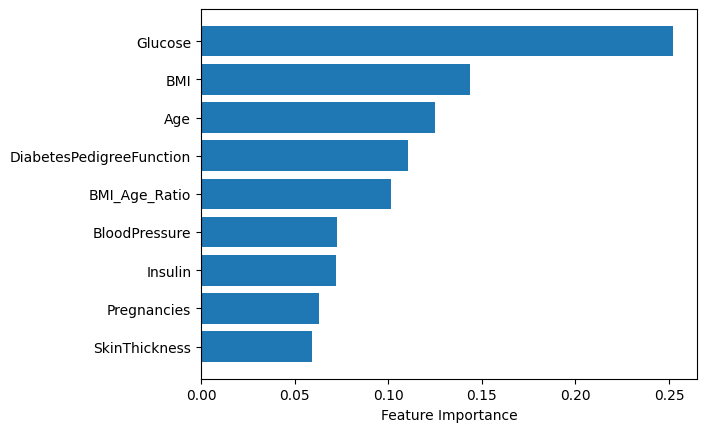

Best RandomForest Parameters: {'max_depth': 30, 'min_samples_leaf': 4, 'n_estimators': 200}
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Ensemble Model Test accuracy: 0.7468


In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/gestational_diabetes_dataset.csv'
data = pd.read_csv(file_path)

# Impute zero values in relevant columns (replace zeros with the mean)
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_with_zeros:
    data[column].replace(0, data[column].mean(), inplace=True)

# Feature Engineering: Create a new feature based on BMI and Age ratio
data['BMI_Age_Ratio'] = data['BMI'] / data['Age']

# Separate features and target
X = data.drop(columns=['Outcome'])  # Features
y = data['Outcome']  # Target (binary classification)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model with more layers, reduced regularization, and adjusted dropout
def build_model():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),  # Reduced regularization
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),  # Reduced dropout

        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Dense(16, activation='relu'),  # Additional layer to increase depth
        tf.keras.layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
    ])

    # Compile the model with Adam optimizer and adjusted learning rate
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Initialize the neural network model
nn_model = build_model()

# Early stopping callback to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Learning rate scheduler to reduce the learning rate if validation loss plateaus
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Train the neural network model
history = nn_model.fit(X_train, y_train, epochs=200, batch_size=64, validation_split=0.2,
                       callbacks=[early_stopping, lr_scheduler])

# Evaluate the neural network model on the test set
loss, accuracy = nn_model.evaluate(X_test, y_test)
print(f'Neural Network Test loss: {loss:.4f}')
print(f'Neural Network Test accuracy: {accuracy:.4f}')

# Build the RandomForest model
rf_model = RandomForestClassifier(n_estimators=100)

# Feature importance analysis using RandomForest
rf_model.fit(X_train, y_train)
feature_importances = rf_model.feature_importances_
sorted_indices = feature_importances.argsort()

# Plot feature importance
plt.barh(range(len(sorted_indices)), feature_importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), X.columns[sorted_indices])
plt.xlabel('Feature Importance')
plt.show()

# Optional: Drop features with low importance based on the plot above
# X_train = X_train[:, sorted_indices[-n:]]  # Keep the top n important features (if applicable)
# X_test = X_test[:, sorted_indices[-n:]]

# Hyperparameter tuning for RandomForest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
rf_grid.fit(X_train, y_train)

# Print best RandomForest parameters
print(f'Best RandomForest Parameters: {rf_grid.best_params_}')

# Get predictions from both models
nn_predictions = (nn_model.predict(X_test) > 0.5).astype("int32")
rf_predictions = rf_grid.predict(X_test)

# Convert neural network predictions to a flat array once to avoid retracing
nn_predictions = nn_predictions.flatten()

# Voting Ensemble: Majority Voting (Soft Voting)
final_predictions = (nn_predictions + rf_predictions) // 2

# Calculate the final ensemble accuracy
ensemble_accuracy = accuracy_score(y_test, final_predictions)
print(f'Ensemble Model Test accuracy: {ensemble_accuracy:.4f}')


More Improvement (Higher Learning Rate)

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 472ms/step - accuracy: 0.6401 - loss: 2.1354 - val_accuracy: 0.6341 - val_loss: 2.0777 - learning_rate: 0.0010
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6512 - loss: 2.0448 - val_accuracy: 0.7154 - val_loss: 2.0266 - learning_rate: 0.0010
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7100 - loss: 1.9728 - val_accuracy: 0.7480 - val_loss: 1.9787 - learning_rate: 0.0010
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7602 - loss: 1.8635 - val_accuracy: 0.7480 - val_loss: 1.9340 - learning_rate: 0.0010
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7734 - loss: 1.8087 - val_accuracy: 0.7480 - val_loss: 1.8926 - learning_rate: 0.0010
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7197 - loss: 1.8115 - val_accuracy: 0.7480 - val_loss: 1.8539 - learning_rate: 0.0010
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7346 - loss: 1.7948 - val_accuracy: 0.739

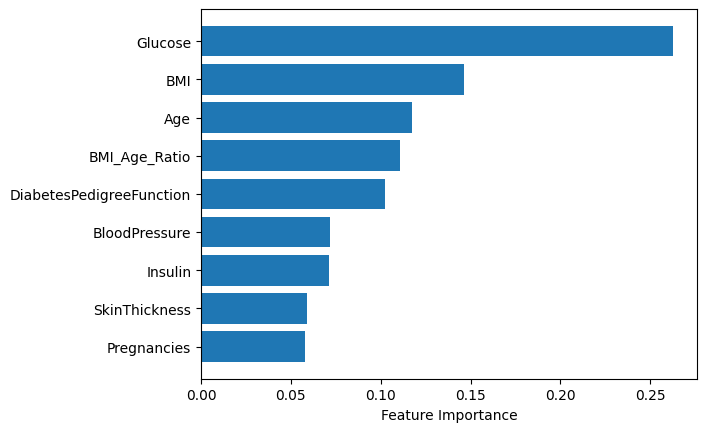

Best RandomForest Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'n_estimators': 300}
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Ensemble Model Test accuracy: 0.7792


In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/gestational_diabetes_dataset.csv'
data = pd.read_csv(file_path)

# Impute zero values in relevant columns (replace zeros with the mean)
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_with_zeros:
    data[column].replace(0, data[column].mean(), inplace=True)

# Feature Engineering: Create a new feature based on BMI and Age ratio
data['BMI_Age_Ratio'] = data['BMI'] / data['Age']

# Separate features and target
X = data.drop(columns=['Outcome'])  # Features
y = data['Outcome']  # Target (binary classification)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model with more layers, reduced regularization, and adjusted dropout
def build_model():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),  # Reduced regularization
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),  # Reduced dropout

        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Dense(16, activation='relu'),  # Additional layer to increase depth
        tf.keras.layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
    ])

    # Compile the model with AdamW optimizer and adjusted learning rate
    model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Initialize the neural network model
nn_model = build_model()

# Early stopping callback to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Learning rate scheduler to reduce the learning rate if validation loss plateaus, with earlier reduction
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Train the neural network model with increased batch size
history = nn_model.fit(X_train, y_train, epochs=200, batch_size=64, validation_split=0.2,
                       callbacks=[early_stopping, lr_scheduler])

# Evaluate the neural network model on the test set
loss, accuracy = nn_model.evaluate(X_test, y_test)
print(f'Neural Network Test loss: {loss:.4f}')
print(f'Neural Network Test accuracy: {accuracy:.4f}')

# Build the RandomForest model
rf_model = RandomForestClassifier(n_estimators=100)

# Feature importance analysis using RandomForest
rf_model.fit(X_train, y_train)
feature_importances = rf_model.feature_importances_
sorted_indices = feature_importances.argsort()

# Plot feature importance
plt.barh(range(len(sorted_indices)), feature_importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), X.columns[sorted_indices])
plt.xlabel('Feature Importance')
plt.show()

# Hyperparameter tuning for RandomForest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
rf_grid.fit(X_train, y_train)

# Print best RandomForest parameters
print(f'Best RandomForest Parameters: {rf_grid.best_params_}')

# Get predictions from both models
nn_predictions = (nn_model.predict(X_test) > 0.5).astype("int32")
rf_predictions = rf_grid.predict(X_test)

# Convert neural network predictions to a flat array once to avoid retracing
nn_predictions = nn_predictions.flatten()

# Voting Ensemble: Majority Voting (Soft Voting)
final_predictions = (nn_predictions + rf_predictions) // 2

# Calculate the final ensemble accuracy
ensemble_accuracy = accuracy_score(y_test, final_predictions)
print(f'Ensemble Model Test accuracy: {ensemble_accuracy:.4f}')

# Note for Instructor: I have decided to stop after this. after many different adjustments,
# i have only been able to increase the accuracy by 0.01 or 0.02. My guess is that the data might be complex. However I have noticed using ensemble methods does help with the accuracy, boosting it a bit.


Loss/Accuracy Curve

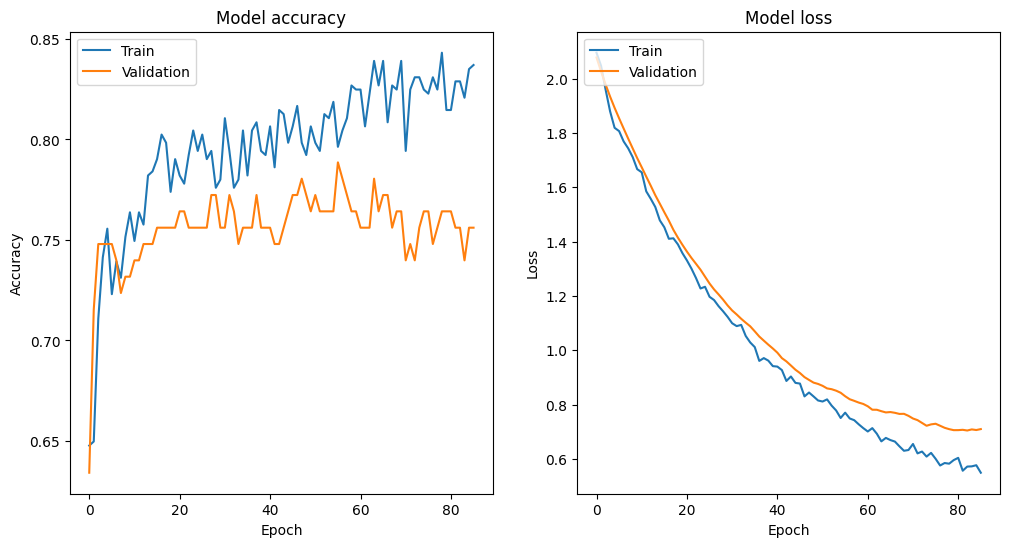

In [44]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


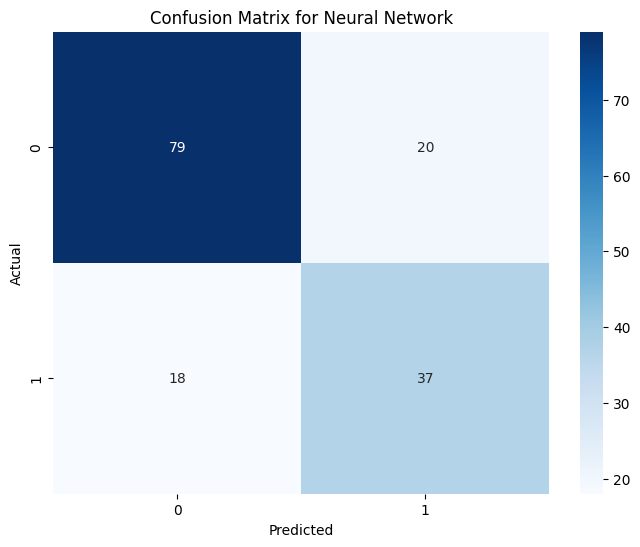

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions from the neural network
nn_predictions = (nn_model.predict(X_test) > 0.5).astype("int32").flatten()

# Generate confusion matrix for the neural network predictions
conf_matrix = confusion_matrix(y_test, nn_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix for Neural Network')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


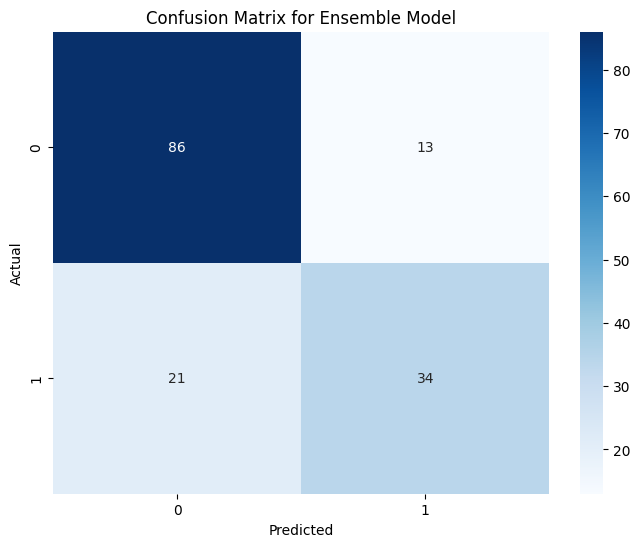

In [46]:
# Confusion matrix for ensemble predictions
conf_matrix_ensemble = confusion_matrix(y_test, final_predictions)

# Plot the confusion matrix for ensemble
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ensemble, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix for Ensemble Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


Using my custom dataset (combined dataset from all the datasets I have collected) This contains the Diabetes Prediction Dataset, PIMA Indians Dataset, and Diabetes Health Indicators Dataset

In [47]:
# Creating custom dataset

import pandas as pd

# Load the datasets
early_stage_diabetes_df = pd.read_excel('/content/Early_stage_diabetes_risk_prediction_dataset.xlsx')
gestational_diabetes_df = pd.read_csv('/content/gestational_diabetes_dataset.csv')
diabetes_prediction_df = pd.read_csv('/content/diabetes_prediction_dataset.csv')
diabetes_012_health_indicators_df = pd.read_csv('/content/diabetes_012_health_indicators_BRFSS2015.csv')

# Standardize outcome labels
early_stage_diabetes_df['Outcome'] = 'Prediabetes/Type 2'
gestational_diabetes_df['Outcome'] = 'Gestational'
diabetes_prediction_df['Outcome'] = diabetes_prediction_df['diabetes'].apply(lambda x: 'Type 2' if x == 1 else 'Non-diabetic')
diabetes_012_health_indicators_df['Outcome'] = diabetes_012_health_indicators_df['Diabetes_012'].apply(lambda x: 'Prediabetes' if x == 1 else ('Type 2' if x == 2 else 'Non-diabetic'))

# Concatenate the datasets with all columns, filling missing values with NaN
combined_df = pd.concat([early_stage_diabetes_df, gestational_diabetes_df, diabetes_prediction_df,
                         diabetes_012_health_indicators_df], ignore_index=True, sort=False)

# Save the combined dataset with all columns
combined_df.to_csv('/content/combined_diabetes_dataset_with_all_columns.csv', index=False)

combined_df.head()


,Age,Gender,Polyuria,Polydipsia,Sudden weight loss,Weakness,Polyphagia,Genital thrush,Visual blurring,Itching,...,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Education,Income
0,40.0,Male,No,Yes,No,Yes,No,No,No,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,58.0,Male,No,No,No,Yes,No,No,Yes,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,41.0,Male,Yes,No,No,Yes,Yes,No,No,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,45.0,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,60.0,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
!pip install imblearn

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Load the dataset
combined_df = pd.read_csv('/content/combined_diabetes_dataset_with_all_columns.csv')

# Perform stratified sampling on the "Outcome" column, taking 10% of the data for testing
sampled_df, _ = train_test_split(combined_df, test_size=0.9, stratify=combined_df['Outcome'], random_state=42)

# Remove 'Prediabetes/Type 2' category from the dataset
sampled_df = sampled_df[sampled_df['Outcome'] != 'Prediabetes/Type 2']

# Shuffle the dataset
sampled_df = sampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Drop columns that have no values
columns_to_drop = [col for col in sampled_df.columns if sampled_df[col].isnull().all()]
sampled_df.drop(columns=columns_to_drop, inplace=True)

# Impute missing numerical values with the mean
numerical_cols = sampled_df.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='mean')
sampled_df[numerical_cols] = imputer.fit_transform(sampled_df[numerical_cols])

# Impute missing categorical values with the mode (most frequent value)
categorical_cols = sampled_df.select_dtypes(include=['object']).columns
categorical_cols = categorical_cols.drop('Outcome')  # Exclude the target column

for col in categorical_cols:
    try:
        sampled_df[col] = imputer.fit_transform(sampled_df[[col]])
    except ValueError as e:
        print(f"Error imputing column '{col}': {e}. Skipping this column.")
        continue

# Convert the 'Outcome' column to numeric labels (not one-hot encoded) for SMOTE
label_encoder = pd.factorize(sampled_df['Outcome'])[0]
y = pd.Series(label_encoder)

# Separate features and labels
X = sampled_df.drop('Outcome', axis=1)  # Features

# One-hot encode categorical columns
X = pd.get_dummies(X, drop_first=True)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled, y)

# Convert the labels back to one-hot encoding
y_balanced = pd.get_dummies(y_balanced)

# Split the balanced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Build a simpler neural network with batch normalization and a smaller learning rate
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')  # Output layer with softmax activation for multiclass
])

# Compile the model with a smaller learning rate
optimizer = Adam(learning_rate=0.00001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Implement early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')







<ipython-input-50-31981b7cb0bc>:14: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,25,29) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_df = pd.read_csv('/content/combined_diabetes_dataset_with_all_columns.csv')


Error imputing column 'gender': Cannot use mean strategy with non-numeric data:
could not convert string to float: 'Female'. Skipping this column.
Error imputing column 'smoking_history': Cannot use mean strategy with non-numeric data:
could not convert string to float: 'No Info'. Skipping this column.
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3052/3052 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.2982 - loss: 2.2371 - val_accuracy: 0.3904 - val_loss: 1.7627
Epoch 2/20
3052/3052 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.3921 - loss: 1.8546 - val_accuracy: 0.4516 - val_loss: 1.5524
Epoch 3/20
3052/3052 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4554 - loss: 1.6425 - val_accuracy: 0.5401 - val_loss: 1.4076
Epoch 4/20
3052/3052 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5048 - loss: 1.4957 - val_accuracy: 0.6548 - val_loss: 1.3091
Epoch 5/20
3052/3052 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5531 - loss: 1.3831 - val_accuracy: 0.7500 - val_loss: 1.2202
Epoch 6/20
3052/3052 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5964 - loss: 1.2827 - val_accuracy: 0.8352 - val_loss: 1.1222
Epoch 7/20
3052/3052 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6488 - loss: 1.1830 - val_accuracy: 0.8945 - val_loss: 1.0252
Epoch 8/20
3052/3052 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6902 - loss: 1.0889 - val_accura

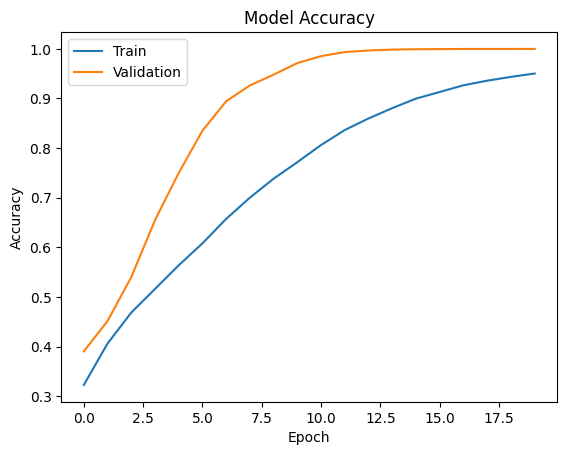

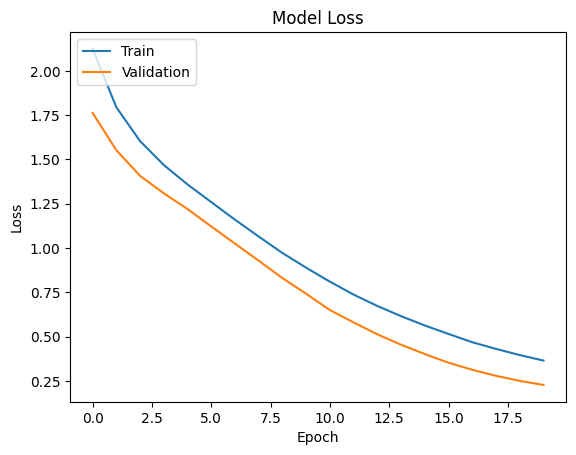

In [51]:
# Visualizing the training history (loss and accuracy)
import matplotlib.pyplot as plt

# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

763/763 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


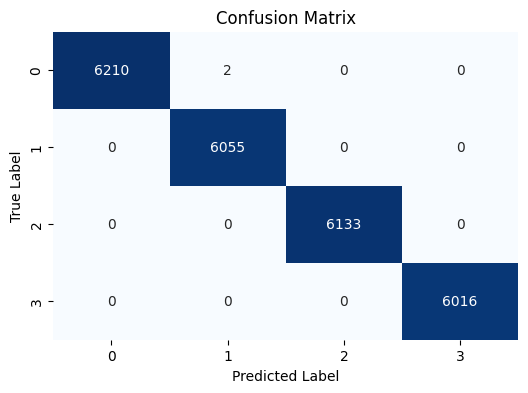

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Make predictions for multiclass classification
y_pred_ann = np.argmax(model.predict(X_test), axis=1)

# Convert y_test from one-hot encoding back to labels
y_test_labels = np.argmax(y_test.values, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test_labels, y_pred_ann)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

